# 1. Classification - Multilayer Perception

Multilayer perceptrons (MLP) are one of the simplest neural networks that can be applied to a problem. They use only the core building blocks of neural networks: simple neurons.

This notebook outlines how to setup a simple MLP (also known as fully-connected networks) and apply it to the MNIST dataset which is series of handwritten digits from zero to nine.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mj-will/intro2ml/blob/master/classification-MLP.ipynb)

## Imports

[Keras](https://keras.io/) is now part of [Tensorflow](https://www.tensorflow.org) and all imports with include tensorflow. There are lots of examples of how to use different elements of Keras on its [tensorflow page](https://www.tensorflow.org/guide/keras)

Below are the imports that are needed for this example, each will be explained when used, so don't worry about them right now.

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaelwilliams/.mi

## Dataset

Neural networks rely on data to learn and in this example we'll be looking at the MNIST dataset.

MNIST is a handwritten digit database with a training set of 60,000 examples and a test set of 10,000 examples. The images are all 28x28 and greyscale. The testing data will be used to validate the network's peformance once it has been trained.

It is available [here](http://yann.lecun.com/exdb/mnist/), but is included in Keras and will automatically download.

In [3]:
# load data using the imp
(x_train, y_train), (x_test, y_test) = mnist.load_data()

It's common practice to refer to the input data as "x" and the output as "y" as we'll be following that convention here.

Let's have a look at some of the data.

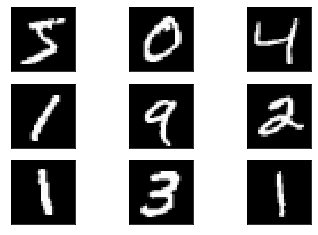

In [4]:
fig, axs = plt.subplots(3,3)
axs = axs.ravel()
for i in range(len(axs)):
    axs[i].imshow(x_train[i].reshape(28,28), cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

Here, the 'x' arrays are the images and the 'y' arrays are the labels

### General parameters

We need to define some general parameters for networks we're going to use:
* Batchsize: refers to the number of images/samples passed to the network in a single instance of training
* Number of classes: refers to the number of possible classes in the data, in this case 10 since there a 10 different digits (0-9)
* Epochs: refers to the number of times the network will train on the complete dataset

In [5]:
batch_size = 128    # number of images passed each iteration of training
num_classes = 10    # digits 0 to 9, so 10 classes
epochs = 20         # number of full passes of the dataset

## MLP

This example uses a simple deep neural net (more than 1 layer)

For an MLP the data needs to be parsed as 1D array, rather than a 2D image. 

So, the data is reshaped according to the number of samples (60,000 or 10,000) and the size of the image 784 (28x28).

The data is then normalized (0,255) to (0,1)nsince neural networks will learn quicker if the data is normalised. This is not to say it's impossible to train a network without normalised data.

In [7]:
# reshape data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize data
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

60000 training samples
10000 test samples


As is the content of the labels vectors looks something like this:
```
array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)
```
The NN expects them labels as binary class matrix instead, i.e. a matrix with a 1 in the position that corresponds to the given class. This is clearer with an example.

In [13]:
# convert class vectors to binary class matrices
# use built-in keras utilties to do this
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now the label for each image looks like this:
```
array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)
```
Notice that in the previous array the first digit was a 7. In the array that now corresponds to this values the 8th position is 1, corresponding to the class "7" since we're including 0.

### The Model

We now need to construct the neural network that we're going to training to classify the digits.

We start by defining the type of keras model. In this case we're using ```Sequential```. When using this type of model any layers we add are assumed to directly follow from the previous one. The other type is ```Model``` which you can read about [here](https://keras.io/models/model/).

We then add the input layer. In this case we're going to use a ```Dense``` layer, i.e. a simple fully connected layer. We need to specify the number of neurons (or nodes), the [activation function](https://en.wikipedia.org/wiki/Activation_function) and the shape of the input with keyword argument ```input_shape```.

We then add another dense layer but this time we don't need to specify the input shape.

Finally we the output layer. Since this is a classifcation task we want the network to predict one of the ten classes, so we use ten neurons. As for the activation function, we use a [softmax function](https://en.wikipedia.org/wiki/Softmax_function) since this ensures the sum of all the output is one, so they can be thought of as a sort of probability.

In [14]:
model = Sequential()    # define the type of keras model
# add first layer with relu activation
model.add(Dense(512, activation='relu', input_shape=(784,)))
# add another layer
model.add(Dense(512, activation='relu'))
# add the output layer with softmax actiavtion for classication
model.add(Dense(num_classes, activation='softmax'))
# print a summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


The model then needs to be compiled. It's at this stage that we specify the loss function, optimiser and metrics.

#### Loss function

$\text{MSE} = \frac{1}{N} (\bar{y} - y)^{2}$


#### Optimiser

#### Metrics

In [11]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

### The Training

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.7924 - acc: 0.7606 - val_loss: 0.3710 - val_acc: 0.8927
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3424 - acc: 0.8989 - val_loss: 0.3027 - val_acc: 0.9119
Epoch 3/20
41216/60000 [===================>..........] - ETA: 1s - loss: 0.2891 - acc: 0.9156

KeyboardInterrupt: 